In [10]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("D:\\Data Science\\Project\\Logistic Reg single\\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
left = df[df.left==1]
left.shape

(3571, 10)

In [13]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [14]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Satisfaction level is low for the employees leaving the firm than that of staying(0.66,0.44)

**Avg monthly hours is higher in employees staying vs leaving(199,207)

**Employees who stayed is most likely given promotion in last 5 years

Plot bar charts showing impact of employee salaries on retention

<AxesSubplot:ylabel='salary'>

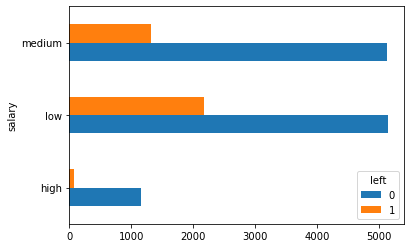

In [15]:
sal = pd.crosstab(df.salary,df.left)
sal.plot(kind='barh')

Plot bar charts showing corelation between department and employee retention

<AxesSubplot:xlabel='Department'>

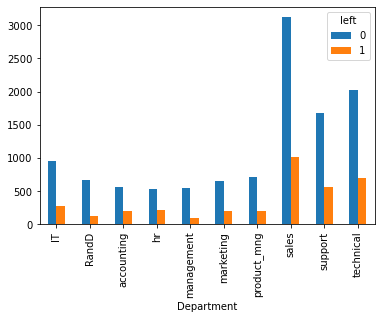

In [16]:
dept = pd.crosstab(df.Department,df.left)
dept.plot(kind='bar')

factors to consider:
a) Satisfaction level
b) Avg mothly hours
c) Promotion
d) Salary

In [17]:
df2 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [28]:
dummy_salary = pd.get_dummies(df2.salary,prefix='salary')
new_df = pd.concat([df2,dummy_salary],axis= 'columns')
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [29]:
x= new_df.drop('salary',axis='columns')
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [30]:
y= df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2)

In [59]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [60]:
LR.fit(x_train,y_train)

LogisticRegression()

In [61]:
LR.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [62]:
LR.score(x_test,y_test)

0.7861666666666667